<a href="https://colab.research.google.com/github/helinlee2010/Hotel_Booking_Prediction/blob/master/hotel_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Demand 🏡
### Context
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? 

- The csv file contains a dataset which compares various booking information between two hotels: a city hotel and a resort hotel
(H1 = Resort Hotel, H2 = City Hotel).
- `is_canceled`: Value indicating if the booking was canceled (1) or not (0)

### Probelm
- Can we predict the possibility of a booking for a hotel based on the previous_cancellation as the target?
- Expected Submission: Two columns --> Hotel Name & Booking_Possibility (0 or 1)
- **Predicting cancelations:** predict if a guest will actually come.
This can help a hotel to plan personel and food requirements.
- **Feature Importance**: Which features are most important to predict cancelations?

#### Column name description
- `lead_time`: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- `meal`: Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- `market_segment`: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- `distribution_channel`: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- `deposit_type`: Indication on if the customer made a deposit to guarantee the booking. Three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay
- `adr`: Average Daily Rate: dividing the sum of all lodging transactions by the total number of staying nights
- `reservation_status`: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

In [ ]:
# Import basic tools 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Setup plot style
plt.style.use("seaborn")

In [ ]:
data = pd.read_csv("drive/My Drive/MachineLearning Data/Hotel Bookings/hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
len(data)

119390

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Data cleaning

In [ ]:
nan_replacements={"children": 0, "country": "Unknown", "agent": 0, "company": 0 }
clean_data = data.fillna(nan_replacements)
data = clean_data

In [ ]:
data["meal"].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
# Since both SC & Undefined means no meal package, we'll combine them
data["meal"].replace("Undefined", "SC", inplace=True)

In [ ]:
# Check which bookings contain 0 adult, 0 children, 0 babies, & drop them
data.loc[data["adults"] + data["children"] + data["babies"]==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
# zero_guest_index = list(data.loc[data["adults"] + data["children"] + data["babies"]==0].index)


In [ ]:
zero_guest_index = list(data.loc[data["adults"] + data["children"] + data["babies"]==0].index)

# Drop a row by index: df.drop([num1, num2...])
data.drop(zero_guest_index, inplace=True)

# Check
data.loc[data["adults"]+data["children"]+data["babies"]==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
data.shape

(119210, 32)

## EDA (Exploratory Data Analysis)

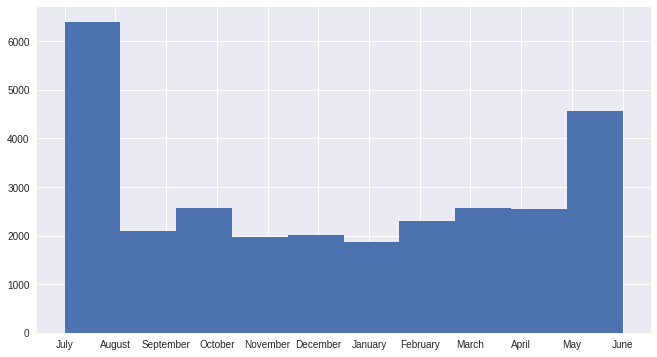

In [ ]:
# Separate resort and city hotels by actual booking (not canceled)
resort = data.loc[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]

city = data.loc[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

fig, ax = plt.subplots(figsize=(11, 6))
ax.hist(resort["arrival_date_month"]);


#### Use the countplot from seaborn:
https://seaborn.pydata.org/generated/seaborn.countplot.html

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


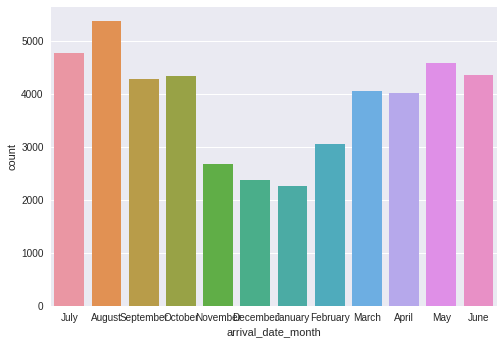

In [ ]:
import seaborn as sns
sns.countplot(x=city["arrival_date_month"]);

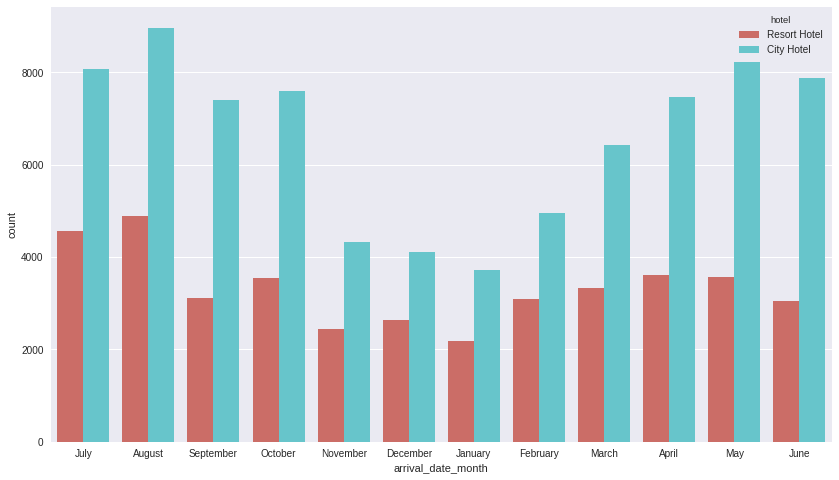

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x=data["arrival_date_month"], hue=data["hotel"], palette="hls");

**Countplot distribution of Market Segments**

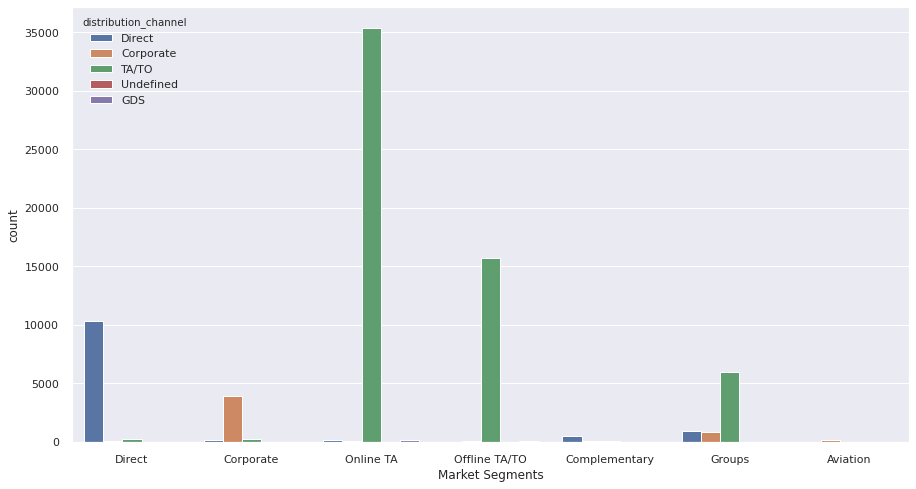

In [ ]:
data_not_canceled = data.loc[data["is_canceled"]==0]
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(x="market_segment", hue="distribution_channel", data=data_not_canceled);
plt.xlabel("Market Segments");

# "TA” means “Travel Agents” and “TO” means “Tour Operators”


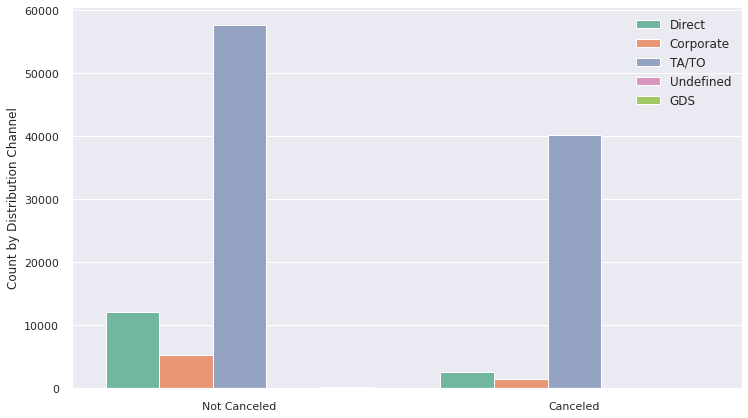

In [ ]:
plt.figure(figsize=(12, 7))
sns.set(style="darkgrid")
sns.countplot(x=data["is_canceled"], hue=data["distribution_channel"], linewidth=1, palette="Set2")
plt.xticks(np.arange(2), ("Not Canceled", "Canceled"))
plt.xlabel("");
plt.ylabel("Count by Distribution Channel")
plt.legend(prop={"size":12});

In [ ]:
country_data = pd.DataFrame(data_not_canceled["country"].value_counts())
# Rename the column: replace "country" with "Number of bookings"
country_data.rename(columns={"country": "Number of Bookings"}, inplace=True)
country_data

,Number of Bookings
PRT,20977
GBR,9668
FRA,8468
ESP,6383
DEU,6067
...,...
BFA,1
ZMB,1
MLI,1
BHS,1


In [ ]:
total_bookings = country_data["Number of Bookings"].sum()

country_data["% of Bookings"] = round(country_data["Number of Bookings"] / total_bookings * 100, 2)
country_data["country"]= country_data.index

In [ ]:
country_data.tail()

,Number of Bookings,% of Bookings,country
BFA,1,0.0,BFA
ZMB,1,0.0,ZMB
MLI,1,0.0,MLI
BHS,1,0.0,BHS
MAC,1,0.0,MAC


In [ ]:
# Combine those less then 1.8% into a new dataframe
others = country_data.loc[country_data["% of Bookings"] < 1.8]
others_df = pd.DataFrame({
    "Number of Bookings": others["Number of Bookings"].sum(),
    "% of Bookings": round(others["Number of Bookings"].sum() / total_bookings * 100, 2),
    "country": "Others"
}, index=["Others"])
others_df.head()

,Number of Bookings,% of Bookings,country
Others,11910,15.88,Others


In [ ]:
main_country_df = country_data.loc[country_data["% of Bookings"] >= 1.8]
main_country_df.tail()

,Number of Bookings,% of Bookings,country
ITA,2428,3.24,ITA
BEL,1868,2.49,BEL
NLD,1716,2.29,NLD
USA,1592,2.12,USA
BRA,1392,1.86,BRA


#### DataFrame concatination
`pd.concat([s1, s2], ignore_index=True)`

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat
- https://stackoverflow.com/questions/48587997/matplotlib-pie-graph-with-all-other-categories/48589225

In [ ]:
country_data_organized = pd.concat([main_country_df, others_df], ignore_index=True)
country_data_organized

,Number of Bookings,% of Bookings,country
0,20977,27.97,PRT
1,9668,12.89,GBR
2,8468,11.29,FRA
3,6383,8.51,ESP
4,6067,8.09,DEU
5,2542,3.39,IRL
6,2428,3.24,ITA
7,1868,2.49,BEL
8,1716,2.29,NLD
9,1592,2.12,USA


<Figure size 1296x1080 with 0 Axes>

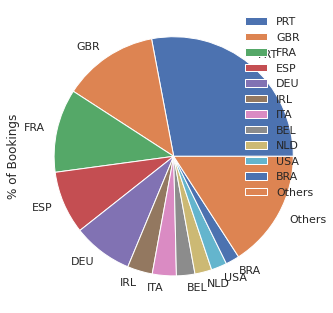

In [ ]:
plt.figure(figsize=(18,15))
country_data_organized.plot(kind="pie", y="% of Bookings", labels=country_data_organized["country"]);

In [ ]:
country_data_organized

,Number of Bookings,% of Bookings,country
0,20977,27.97,PRT
1,9668,12.89,GBR
2,8468,11.29,FRA
3,6383,8.51,ESP
4,6067,8.09,DEU
5,2542,3.39,IRL
6,2428,3.24,ITA
7,1868,2.49,BEL
8,1716,2.29,NLD
9,1592,2.12,USA


In [ ]:
# Another way for pie chart: plotly.express

import plotly.express as px

country_list = ["Portugal", "Others", "UK", "France", "Spain", "Germany",
                "Ireland", "Italy", "Belgium", "Netherlands", "USA", "Brazil"]

fig = px.pie(country_data_organized,
             values="Number of Bookings",
             names= country_list,
             title="Number & Percentage of Bookings from different countries")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
# Represent only large countries (Quick way)(No need to concatinate)
country_data.loc[country_data["% of Bookings"] < 1.8, "country"] = "Others"
fig = px.pie(country_data,
             names="country",
             values="Number of Bookings",
             title="Booking Countries")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

## Plot Correlation Matrix

In [ ]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


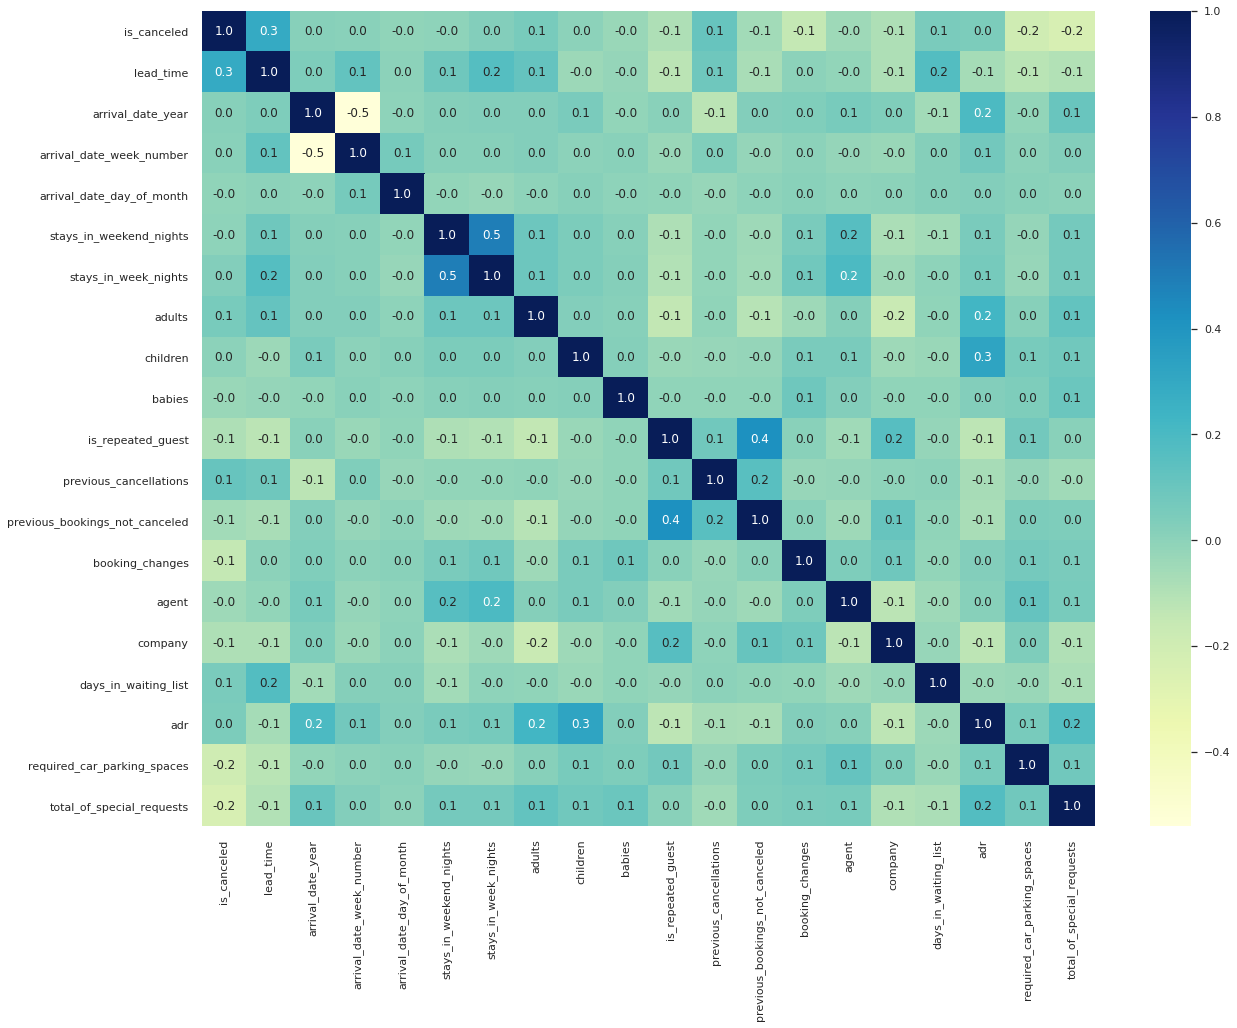

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(data.corr(),
                 annot=True,
                 cbar=True,
                 cmap="YlGnBu",
                 fmt=".1f");

From the correlation matrix, we can see that:

Reservation, deposit type, country, and lead time correlate more on whether this hotel booking is canceled or not.

## Convert string to categories
One way we can turn all of our data into numbers is by converting them into pandas catgories.

In [ ]:
for label, content in data.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

hotel
arrival_date_month
meal
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type
reservation_status
reservation_status_date


In [ ]:
# Turn strings into categories:

for label, content in data.items():
  if pd.api.types.is_string_dtype(content):
    data[label] = content.astype("category").cat.as_ordered()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119210 non-null  category
 1   is_canceled                     119210 non-null  int64   
 2   lead_time                       119210 non-null  int64   
 3   arrival_date_year               119210 non-null  int64   
 4   arrival_date_month              119210 non-null  category
 5   arrival_date_week_number        119210 non-null  int64   
 6   arrival_date_day_of_month       119210 non-null  int64   
 7   stays_in_weekend_nights         119210 non-null  int64   
 8   stays_in_week_nights            119210 non-null  int64   
 9   adults                          119210 non-null  int64   
 10  children                        119210 non-null  float64 
 11  babies                          119210 non-null  int64   
 12  me

In [ ]:
data.country.cat.categories

Index(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA',
       ...
       'URY', 'USA', 'UZB', 'Unknown', 'VEN', 'VGB', 'VNM', 'ZAF', 'ZMB',
       'ZWE'],
      dtype='object', length=178)

In [ ]:
data.country.cat.codes

0         135
1         135
2          59
3          59
4          59
         ... 
119385     15
119386     56
119387     43
119388     59
119389     43
Length: 119210, dtype: int16

In [ ]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Turn categorical data into numeric

In [ ]:
for label, content in data.items():
  if not pd.api.types.is_numeric_dtype(content):
    data[label] = pd.Categorical(content).codes+1

In [ ]:
data.head().T

,0,1,2,3,4
hotel,2.0,2.0,2.0,2.0,2.0
is_canceled,0.0,0.0,0.0,0.0,0.0
lead_time,342.0,737.0,7.0,13.0,14.0
arrival_date_year,2015.0,2015.0,2015.0,2015.0,2015.0
arrival_date_month,6.0,6.0,6.0,6.0,6.0
arrival_date_week_number,27.0,27.0,27.0,27.0,27.0
arrival_date_day_of_month,1.0,1.0,1.0,1.0,1.0
stays_in_weekend_nights,0.0,0.0,0.0,0.0,0.0
stays_in_week_nights,0.0,0.0,1.0,1.0,2.0
adults,2.0,2.0,1.0,1.0,2.0


In [ ]:
# Save processed data
data.to_csv("drive/My Drive/MachineLearning Data/Hotel Bookings/processed_data.csv", index=False)

### Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop("is_canceled", axis=1)
y = data["is_canceled"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95368, 31), (23842, 31), (95368,), (23842,))

## Choose model and instantiate
1. On map, it suggests to use SGDClassifier
2. Try RandomForestClassifier
3. Try LogisticRegression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Put selected models in a dictionary:
models = {
    "Random Forest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SGD": SGDClassifier()
}

# Create a function to fit and score the model

def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fit all the models in dictionary of models, and evaluate them using model.score
  on test data.
  """
  np.random.seed(42)
  model_scores = {}

  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  
  return model_scores                                   

In [ ]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'LogisticRegression': 0.779129267678886,
 'Random Forest': 0.9999161144199312,
 'SGD': 0.968417079104102}

From the result, we can screen out logistic regression, and RandomForestClassifier and SGDClassifier did very well. 
But the score from here is not reliable, why?

### Compare models visually

In [ ]:
# Put the model scores into a dataframe
model_scores_df = pd.DataFrame(model_scores, index=["accuracy"])
model_scores_df = model_scores_df.T #Overwrite
model_scores_df

,accuracy
Random Forest,0.999916
LogisticRegression,0.779129
SGD,0.968417


In [ ]:
fig = px.bar(model_scores_df, y="accuracy", text= 'accuracy', color="accuracy", 
             color_continuous_scale=px.colors.sequential.Oryel,
             )
fig.update_traces(texttemplate='%{text:,.2%}', textposition='outside',)
# for texttemplate, check out d3-format syntax

fig.update_layout(height=600, width=800, title_text="Comparison of 3 models' Accuracy Score",
                  title_font_size=27)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,2],
        ticktext = ['RandomForestClassifier', 'LogisticRegression', 'SGDClassifier']
    )
)

fig.show()

## Evaluate the model beyond accuracy

- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score

In [ ]:
rf = models["Random Forest"]
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
sgd = models["SGD"]
sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Make prediction with our models
y_preds_rf = rf.predict(X_test)
y_preds_sgd = sgd.predict(X_test)

y_preds_rf[:10]

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
np.array(y_test)[:10]

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

### Plot ROC curve with the built-in function

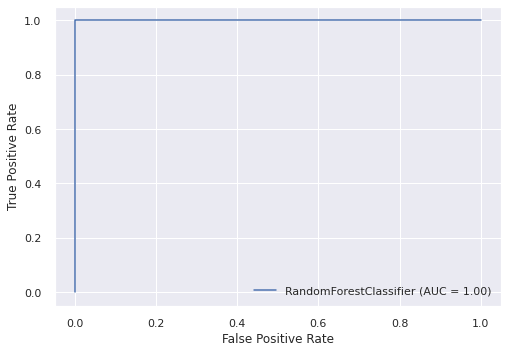

In [ ]:
from sklearn.metrics import plot_roc_curve

# ROC for RandomForestClassifier
plot_roc_curve(rf, X_test, y_test);

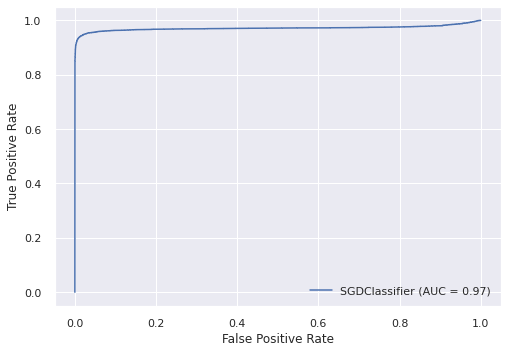

In [ ]:
# ROC for SGDClassifier
plot_roc_curve(sgd, X_test, y_test);

### Plot Confusion Matrix with seaborn's heatmap

**Confusion Matrix for RandomForestClassifier**

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds_rf)

array([[14958,     0],
       [    2,  8882]])

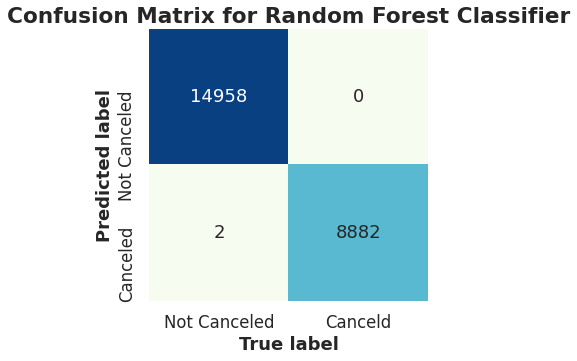

In [ ]:
# Create a function for plotting confusion matrix

def plot_confusion_matrix(title_model_name, y_true, y_preds):
  """
  Plot a confusion matrix with seaborn's heatmap.
  title_model_name: a string for the model name
  """
  # set plt font style dict for "fontdict" parameter
  label_font = {
      "weight": "bold",
      "family": "sans-serif"
  }

  title_font = {
      "weight": "bold",
      "size": "large"
  }
  
  # Change seaborn default font_scale
  sns.set(font_scale=1.5)


  fig, ax = plt.subplots(figsize=(5,5))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   fmt=".0f",
                   cbar=False,
                   cmap="GnBu",
                   xticklabels=["Not Canceled", "Canceld"],
                   yticklabels=["Not Canceled", "Canceled"],) # from top to bottom


  plt.xlabel("True label", fontdict = label_font)
  plt.ylabel("Predicted label", fontdict=label_font)
  plt.title(f"Confusion Matrix for {title_model_name}", fontdict=title_font)


# Check out the confusion matrix for
plot_confusion_matrix("Random Forest Classifier", y_test, y_preds_rf);


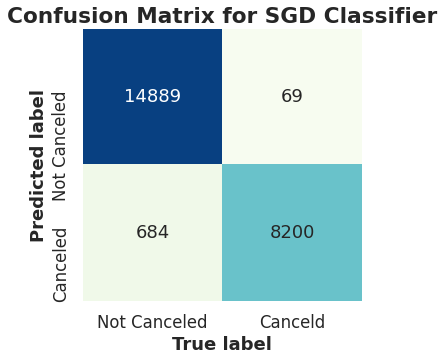

In [ ]:
plot_confusion_matrix("SGD Classifier",y_test, y_preds_sgd);

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

# For Random Forest Classifier
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14958
           1       1.00      1.00      1.00      8884

    accuracy                           1.00     23842
   macro avg       1.00      1.00      1.00     23842
weighted avg       1.00      1.00      1.00     23842



In [ ]:
# For SGD Classifier
print(classification_report(y_test, y_preds_sgd))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14958
           1       0.99      0.92      0.96      8884

    accuracy                           0.97     23842
   macro avg       0.97      0.96      0.97     23842
weighted avg       0.97      0.97      0.97     23842



## Evaluate with Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

def list_cv_scores(model, X, y):
  
  # Mean Accuracy
  cv_acc = np.mean(cross_val_score(model, X, y, cv=5, scoring="accuracy"))

  # Mean Precision
  cv_precision = np.mean(cross_val_score(model, X, y, cv=5, scoring="precision"))

  # Mean Recall
  cv_recall = np.mean(cross_val_score(model, X, y, cv=5, scoring="recall"))

  # Mean F1 score
  cv_f1 = np.mean(cross_val_score(model, X, y, cv=5, scoring="f1"))

  avg_cv_scores = {
      "Average CV Accuracy": round(cv_acc,2),
      "Average CV Precision": round(cv_precision,2),
      "Average CV Recall": round(cv_recall,2),
      "Average CV F1 Score": round(cv_f1,2)
  }

  print(f"""Average CV Accuracy: {round(cv_acc,2)}
          Average CV Precision: {round(cv_precision,2)}
          Average CV Recall: {round(cv_recall,2)}
          Average CV F1 Score: {round(cv_f1,2)}""")
  
  return avg_cv_scores


In [ ]:
%time
rf_cv_scores = list_cv_scores(rf, X, y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Average CV Accuracy: 1.0
          Average CV Precision: 1.0
          Average CV Recall: 1.0
          Average CV F1 Score: 1.0


In [ ]:
%time
sgd_cv_scores = list_cv_scores(sgd, X, y)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Average CV Accuracy: 0.79
          Average CV Precision: 0.81
          Average CV Recall: 0.7
          Average CV F1 Score: 0.68


In [ ]:
# Create dataframe for plotting scores latter
rf_cv_scores_df = pd.DataFrame(rf_cv_scores, index=[0]).T
rf_cv_scores_df

,0
Average CV Accuracy,1.0
Average CV Precision,1.0
Average CV Recall,1.0
Average CV F1 Score,1.0


In [ ]:
sgd_cv_scores_df = pd.DataFrame(sgd_cv_scores, index=[0])
sgd_cv_scores_df

,Average CV Accuracy,Average CV Precision,Average CV Recall,Average CV F1 Score
0,0.79,0.81,0.7,0.68


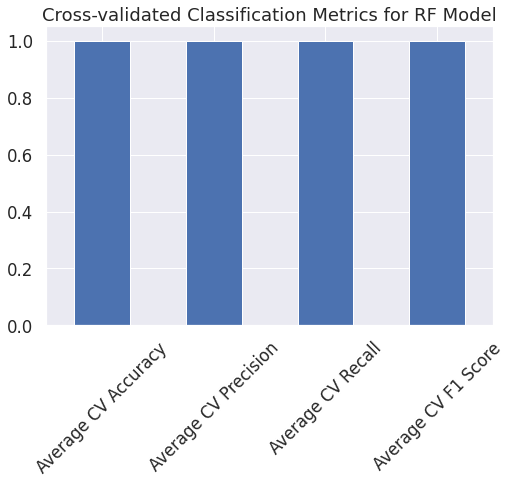

In [ ]:
rf_cv_scores_df.plot.bar(title= "Cross-validated Classification Metrics for RF Model",
                         legend=False)
plt.xticks(rotation="45");

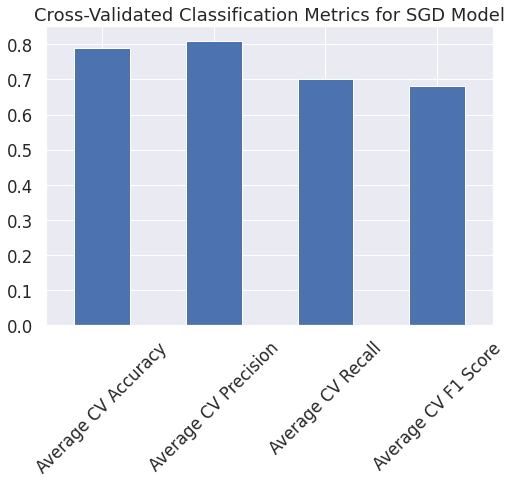

In [ ]:
sgd_cv_scores_df.T.plot.bar(title="Cross-Validated Classification Metrics for SGD Model",
                            legend=False)
plt.xticks(rotation="45");

## Feature Importance

In [ ]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42,
                       verbose=0, warm_start=False)

In [ ]:
rf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rf.coef_

AttributeError: ignored

In [ ]:
sgd = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
sgd.fit(X_test, y_test)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd.coef_[0]

array([-1.29103782e+02,  1.88151203e+01, -3.39011176e+00, -1.13479530e+01,
       -4.93082834e+01, -3.14031405e+00,  1.78605362e+01,  3.13912454e+01,
        6.35764906e+01,  1.61387162e+01, -1.13895860e+01, -2.68145945e+01,
        4.54810256e+01,  3.56651652e+02,  2.45224031e+02, -3.36632150e+01,
        1.73615355e+02, -1.70748629e+02,  3.96226746e+01, -5.50200269e+02,
       -2.86092721e+02,  3.33405596e+02, -3.16410431e+00, -1.28110539e+01,
       -1.43782371e+01, -1.88365315e+02,  3.43833164e+01, -1.69053573e+02,
       -5.15793609e+02, -1.58956690e+03, -5.79887538e-01])

In [ ]:
data.head

<bound method NDFrame.head of         hotel  is_canceled  ...  reservation_status  reservation_status_date
0           2            0  ...                   2                      122
1           2            0  ...                   2                      122
2           2            0  ...                   2                      123
3           2            0  ...                   2                      123
4           2            0  ...                   2                      124
...       ...          ...  ...                 ...                      ...
119385      1            0  ...                   2                      920
119386      1            0  ...                   2                      921
119387      1            0  ...                   2                      921
119388      1            0  ...                   2                      921
119389      1            0  ...                   2                      921

[119210 rows x 32 columns]>

In [ ]:
len(sgd.coef_[0]), len(data.columns)

(31, 32)

In [ ]:
sgd_coef = sgd.coef_[0]
sgd_coef

array([-1.29103782e+02,  1.88151203e+01, -3.39011176e+00, -1.13479530e+01,
       -4.93082834e+01, -3.14031405e+00,  1.78605362e+01,  3.13912454e+01,
        6.35764906e+01,  1.61387162e+01, -1.13895860e+01, -2.68145945e+01,
        4.54810256e+01,  3.56651652e+02,  2.45224031e+02, -3.36632150e+01,
        1.73615355e+02, -1.70748629e+02,  3.96226746e+01, -5.50200269e+02,
       -2.86092721e+02,  3.33405596e+02, -3.16410431e+00, -1.28110539e+01,
       -1.43782371e+01, -1.88365315e+02,  3.43833164e+01, -1.69053573e+02,
       -5.15793609e+02, -1.58956690e+03, -5.79887538e-01])

In [ ]:
features = data.columns.drop("is_canceled")
features

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
len(features)

31

In [ ]:

import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=features, y=sgd_coef)])
fig.show()

In [ ]:
feature_dict = dict(zip(features, sgd_coef))
feature_dict

{'adr': 34.38331636790172,
 'adults': 63.57649058603832,
 'agent': -3.164104307194947,
 'arrival_date_day_of_month': -3.140314049248101,
 'arrival_date_month': -11.347953041602521,
 'arrival_date_week_number': -49.308283381247044,
 'arrival_date_year': -3.390111757710177,
 'assigned_room_type': -550.2002693646018,
 'babies': -11.389585993008534,
 'booking_changes': -286.0927207459421,
 'children': 16.138716236046015,
 'company': -12.811053905451168,
 'country': 45.48102563369506,
 'customer_type': -188.3653148743583,
 'days_in_waiting_list': -14.378237147832403,
 'deposit_type': 333.40559624151086,
 'distribution_channel': 245.22403137225373,
 'hotel': -129.10378232392088,
 'is_repeated_guest': -33.66321499761218,
 'lead_time': 18.81512025530441,
 'market_segment': 356.65165203974954,
 'meal': -26.81459449058997,
 'previous_bookings_not_canceled': -170.74862886332366,
 'previous_cancellations': 173.61535494608776,
 'required_car_parking_spaces': -169.0535729843798,
 'reservation_status

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=["Coef"])
feature_df

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
Coef,-129.103782,18.81512,-3.390112,-11.347953,-49.308283,-3.140314,17.860536,31.391245,63.576491,16.138716,-11.389586,-26.814594,45.481026,356.651652,245.224031,-33.663215,173.615355,-170.748629,39.622675,-550.200269,-286.092721,333.405596,-3.164104,-12.811054,-14.378237,-188.365315,34.383316,-169.053573,-515.793609,-1589.566901,-0.579888


In [ ]:
data.groupby("reservation_status")["is_canceled"].value_counts()

reservation_status  is_canceled
1                   1              42993
2                   0              75011
3                   1               1206
Name: is_canceled, dtype: int64

In [ ]:
res_stat_cancel = data.groupby("reservation_status")["is_canceled"].describe()
res_stat_cancel

,count,mean,std,min,25%,50%,75%,max
reservation_status,,,,,,,,
1,42993.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,75011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1206.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
type(res_stat_cancel)

pandas.core.frame.DataFrame

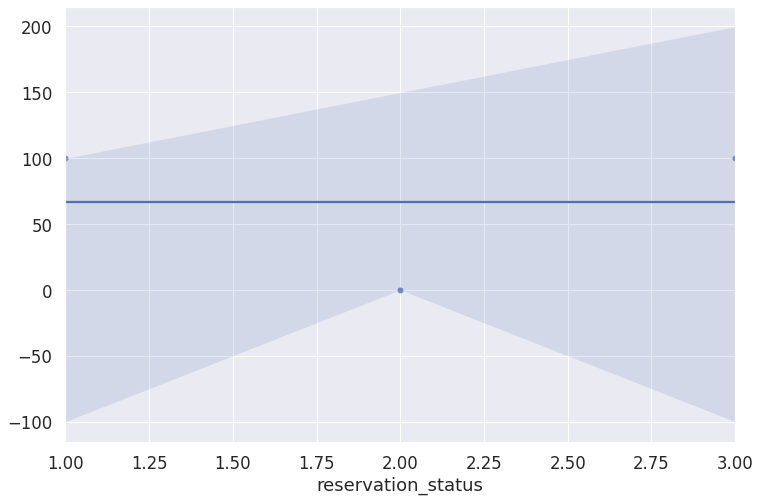

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x = res_stat_cancel.index,
            y = res_stat_cancel["mean"].values*100)
plt.show()

In [ ]:
room_type_cancel = data.groupby("assigned_room_type")["is_canceled"].describe()
room_type_cancel

,count,mean,std,min,25%,50%,75%,max
assigned_room_type,,,,,,,,
1,74020.0,0.445055,0.496975,0.0,0.0,0.0,1.0,1.0
2,2154.0,0.237233,0.425485,0.0,0.0,0.0,0.0,1.0
3,2370.0,0.188186,0.390943,0.0,0.0,0.0,0.0,1.0
4,25309.0,0.251373,0.433811,0.0,0.0,0.0,1.0,1.0
5,7798.0,0.251603,0.433962,0.0,0.0,0.0,1.0,1.0
6,3751.0,0.247134,0.431403,0.0,0.0,0.0,0.0,1.0
7,2549.0,0.306002,0.460921,0.0,0.0,0.0,1.0,1.0
8,712.0,0.352528,0.478093,0.0,0.0,0.0,1.0,1.0
9,359.0,0.013928,0.117354,0.0,0.0,0.0,0.0,1.0


### Seaborn's regression plot

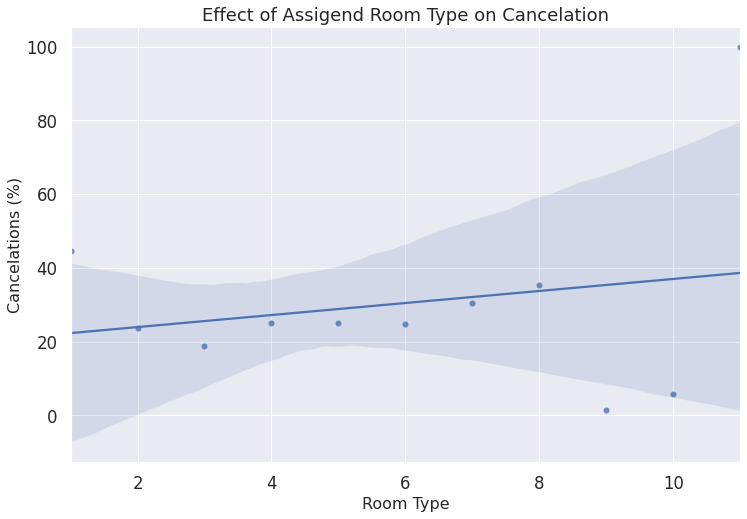

In [ ]:

plt.figure(figsize=(12, 8))

sns.regplot(x=room_type_cancel.index,
            y=room_type_cancel["mean"].values * 100)
plt.title("Effect of Assigend Room Type on Cancelation", fontsize=18)
plt.xlabel("Room Type", fontsize=16)
plt.ylabel("Cancelations (%)", fontsize=16)

plt.show()